<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Working With Time Series Data in FBProphet

_By Steven Longstreet (Washington DC) and Bryce Peake (Washington DC)_

### Learning Objectives
 
**After this lesson, you will be able to:**
- Create and visualize a Time Series model using FBProphet
- Evaluate a Time Series model

<h2><a id="A">What is a Time Series?</a></h2>
A **time series** is a series of data points that's indexed (or listed, or graphed) in time order. Most commonly, a time series is a sequence that's taken at successive equally spaced points in time. Time series are often represented as a set of observations that have a time-bound relation, which is represented as an index.

Time series are commonly found in sales, analysis, stock market trends, economic phenomena, and social science problems.

These data sets are often investigated to evaluate the long-term trends, forecast the future, or perform some other form of analysis.

## Time Series modeling with FBProphet
[Prophet Documentation](https://facebook.github.io/prophet/docs/quick_start.html)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from prophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Read in the data

Read the data in from the retail sales CSV file in the examples folder then set the index to the 'date' column. We are also parsing dates in the data file.

In [2]:
sales = pd.read_csv('./data/retail_sales.csv', parse_dates = True, low_memory = False)

In [3]:
sales.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


# Prepare for Prophet

For prophet to work, we need to change the names of these columns to 'ds' and 'y', so lets just create a new dataframe and keep our old one handy (you'll see why later). The new dataframe will initially be created with an integer index so we can rename the columns

In [4]:
# Since we are making a copy of the dataframe, we don't need inplace = True
sales_df = sales.rename(columns={'date':'ds', 'sales':'y'})
sales_df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


Now's a good time to take a look at your data.  Plot the data using pandas' ```plot``` function

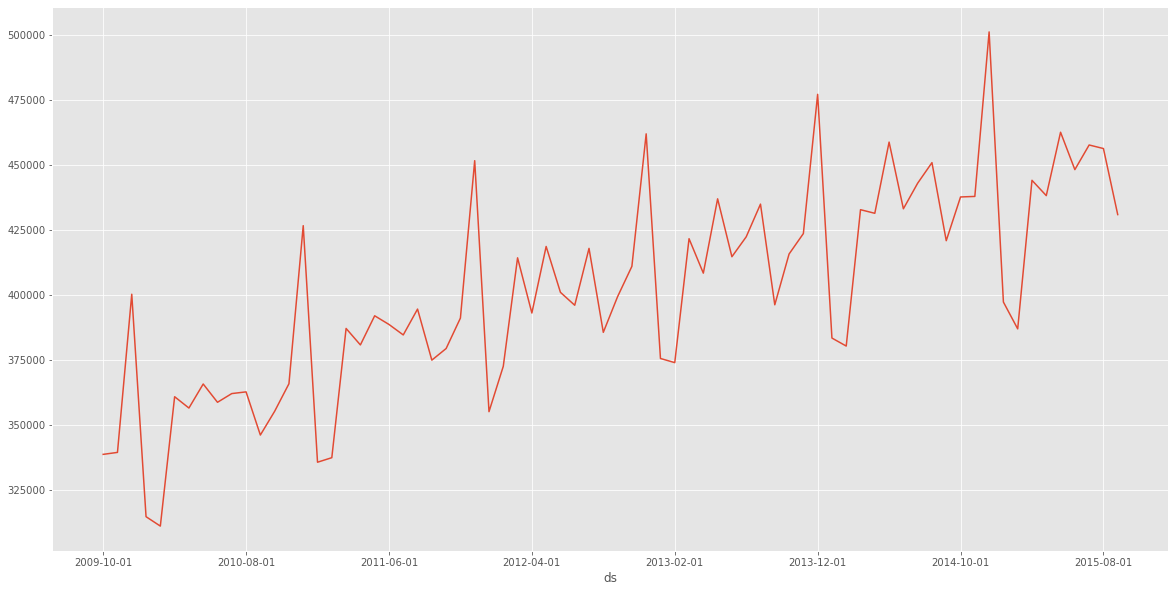

In [5]:
# Prophet doesn't require the date ('ds') to be in the index, but df.plot() so we add .set_index('ds')
sales_df.set_index('ds').y.plot();

# Running Prophet

Now, let's set prophet up to begin modeling our data.

Note: Since we are using monthly data, you'll see a message from Prophet saying ```Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.```  This is OK since we are working with monthly data but you can disable it by using ```weekly_seasonality=True``` in the instantiation of Prophet.

In [6]:
# Instantiate Model
model = Prophet()

# Fit Model
model.fit(sales_df)

07:55:31 - cmdstanpy - INFO - Chain [1] start processing
07:55:31 - cmdstanpy - INFO - Chain [1] done processing


Forecasting is fairly useless unless you can look into the future, so we need to add some future dates to our dataframe. For this example, I want to forecast 2 years into the future, so I'll built a future dataframe with 24 periods since we are working with monthly data. Note the ```freq='m'``` inclusion to ensure we are adding 24 months of data.

This can be done with the following code:


In [7]:
# Creat future data frame
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


To forecast this future data, we need to run it through Prophet's model.

In [8]:
# Add predictions to the forecast dataframe
forecast = model.predict(future)

The resulting forecast dataframe contains quite a bit of data, but we really only care about a few columns.  First, let's look at the full dataframe:

In [9]:
forecast.tail().T

,91,92,93,94,95
ds,2017-04-30 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00
trend,473185.161743,474338.610773,475454.851769,476608.300799,477761.749829
yhat_lower,476366.14495,472883.491355,479812.841453,470158.478095,457163.266464
yhat_upper,488649.312675,483684.457908,491954.204485,482517.821342,469702.403398
trend_lower,471396.759783,472382.300435,473365.057025,474405.92705,475361.706186
trend_upper,475096.599263,476412.480137,477718.816649,479035.190447,480346.548696
additive_terms,9543.960499,4128.807531,10584.481555,-410.901128,-14234.061249
additive_terms_lower,9543.960499,4128.807531,10584.481555,-410.901128,-14234.061249
additive_terms_upper,9543.960499,4128.807531,10584.481555,-410.901128,-14234.061249
yearly,9543.960499,4128.807531,10584.481555,-410.901128,-14234.061249


We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,482729.122242,476366.144950,488649.312675
92,2017-05-31,478467.418304,472883.491355,483684.457908
93,2017-06-30,486039.333324,479812.841453,491954.204485
94,2017-07-31,476197.399672,470158.478095,482517.821342
95,2017-08-31,463527.688580,457163.266464,469702.403398


# Plotting Prophet results

Prophet has a plotting mechanism called ```plot```.  This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

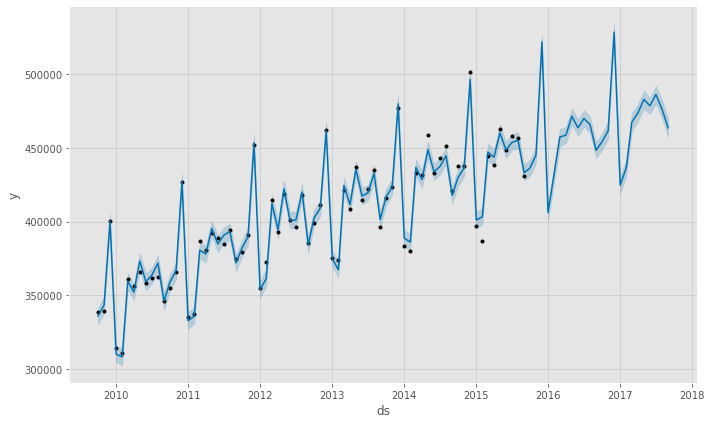

In [11]:
# Plot the forecast
model.plot(forecast);

## Evaluating Prophet
The shaded blue area is the error of the forecast. But we can only eyeball it. Let's look at the R-squared (amount of variance) and Mean Squared Error. 

In [12]:
#To do this, we have to get the y-hat and original y's from the data
metric_df = pd.concat([forecast[['ds','yhat']],sales_df['y']], axis=1)
metric_df.head()

,ds,yhat,y
0,2009-10-01,335989.177337,338630.0
1,2009-11-01,343393.062411,339386.0
2,2009-12-01,400488.295924,400264.0
3,2010-01-01,310178.396738,314640.0
4,2010-02-01,308344.494159,311022.0


Remember we added 24 months of forecast so we don't have an actual `y` data for those months.

In [13]:
# check the tail, because we added 24 months of forecast.
metric_df.tail()

,ds,yhat,y
91,2017-04-30,482729.122242,NaN
92,2017-05-31,478467.418304,NaN
93,2017-06-30,486039.333324,NaN
94,2017-07-31,476197.399672,NaN
95,2017-08-31,463527.688580,NaN


In [14]:
# The tail has NaN values, because they're predictions - there was no real Y. Let's drop those for model evaluation.
metric_df.dropna(inplace = True)

In [15]:
metric_df.tail()

,ds,yhat,y
67,2015-05-01,459984.836015,462615.0
68,2015-06-01,448605.317668,448229.0
69,2015-07-01,453589.278882,457710.0
70,2015-08-01,455140.347837,456340.0
71,2015-09-01,433037.517311,430917.0


Generate some metrics on our model.

In [16]:
#Let's take a look at the numbers - from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R-squared: ", r2_score(metric_df['y'], metric_df['yhat']))
print("Mean Squared Error: ", mean_squared_error(metric_df['y'], metric_df['yhat']))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df['y'], metric_df['yhat'])))

R-squared:  0.9877986969691978
Mean Squared Error:  19250404.840484288
RMSE:  4387.52832930846


An R2 value of .99 is phenomenal... and too good to be true. Our massive MSE confirms any suspcion tha thte model is overfit and won't be very predictive in the future. Part of the problem in this example is that the its monthly, and there aren't enough data points to build a robust model. 

## Accounting for Seasonality and Trends

We can see from this data that there is a spike in the same month each year. While spike could be due to many different reasons, let's assume its because there's a major promotion that this company runs every year at that time, which is in December for this dataset.

When patterns repeat over *known, fixed periods* of time within a data set, we call this **seasonality**. A seasonal pattern exists when a series is influenced by factors related to the cyclic nature of time — i.e., time of month, quarter, year, etc. Seasonality is of a fixed and known period, otherwise it is not truly seasonality. Additionally, it must be either attributed to another factor or counted as a set of anomalous events in the data.

### Prophet calls them "holidays"

Because we know this promotion occurs every december, we want to use this knowledge to help prophet better forecast those months, so we'll use prohpet's ```holiday``` construct (explained here https://facebookincubator.github.io/prophet/docs/holiday_effects.html).

The holiday object is a pandas dataframe with the holiday and date of the holiday. For this example, the construct would look like this:

```promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})```

This ```promotions``` dataframe consisists of promotion dates for Dec in 2009 through 2015,  The ```lower_window``` and ```upper_window``` values are set to zero to indicate that we don't want prophet to consider any other months than the ones listed.

In [17]:
# Build the promotions dataframe from above here - be sure you understand the syntax and logic!
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

promotions

,holiday,ds,lower_window,upper_window
0,december_promotion,2009-12-01,0,0
1,december_promotion,2010-12-01,0,0
2,december_promotion,2011-12-01,0,0
3,december_promotion,2012-12-01,0,0
4,december_promotion,2013-12-01,0,0
5,december_promotion,2014-12-01,0,0
6,december_promotion,2015-12-01,0,0


In [18]:
#Now let's set up prophet to model our data using holidays - Instantiate and fit the model
model = Prophet(holidays=promotions,
                weekly_seasonality=False)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(sales_df)

07:55:33 - cmdstanpy - INFO - Chain [1] start processing
07:55:33 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
#We've instantiated the model, so now we need to build our future dates to forecast into!
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

#... and then run our future data through prophet's model
forecast = model.predict(future)

forecast.head().T

,0,1,2,3,4
ds,2009-10-01 00:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,2010-01-01 00:00:00,2010-02-01 00:00:00
trend,328135.037424,330071.552011,331945.598385,333882.112976,335818.627566
yhat_lower,330564.071601,339806.40704,395338.981995,307104.079713,305893.681641
yhat_upper,339604.862248,348669.299605,404165.956899,316616.236428,315137.905329
trend_lower,328135.037424,330071.552011,331945.598385,333882.112976,335818.627566
trend_upper,328135.037424,330071.552011,331945.598385,333882.112976,335818.627566
additive_terms,7026.213709,14284.693112,68062.524362,-22243.66172,-25163.850429
additive_terms_lower,7026.213709,14284.693112,68062.524362,-22243.66172,-25163.850429
additive_terms_upper,7026.213709,14284.693112,68062.524362,-22243.66172,-25163.850429
december_promotion,0.0,0.0,-170051.978176,0.0,0.0


In [20]:
#while our new df contains a bit of data, we only care about a few features...
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,1.127865e+06,1.122430e+06,1.133531e+06
92,2017-05-31,7.844375e+05,7.792534e+05,7.902043e+05
93,2017-06-30,1.130558e+06,1.125200e+06,1.136190e+06
94,2017-07-31,7.822787e+05,7.766254e+05,7.887157e+05
95,2017-08-31,5.762218e+05,5.707755e+05,5.826660e+05


## Visualizing with holidays!
Same as above at first blush!

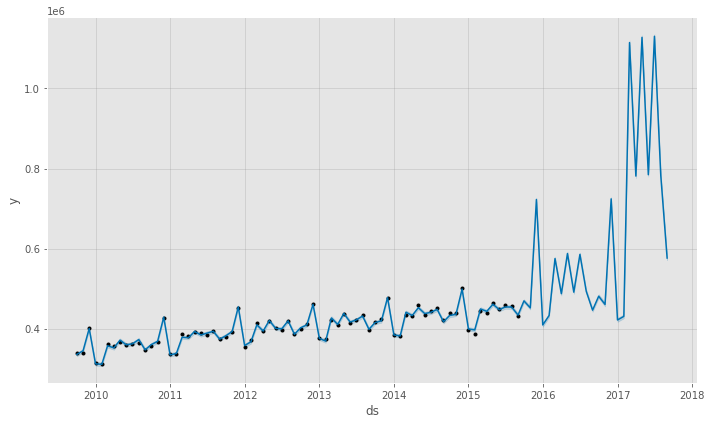

In [21]:
#use Prophet's .plot() method to visualize your timeseries.
model.plot(forecast);

Prophet also allows you to examine the ```components``` of a timeseries using the ```.plot_components()``` method

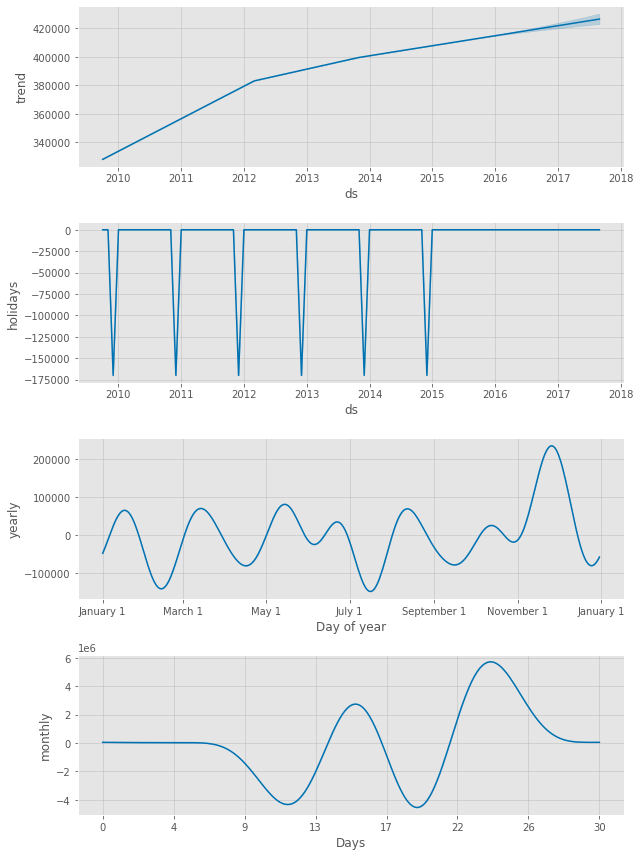

In [22]:
model.plot_components(forecast);

## Why holidays matter
Let's re-run our prophet model without holidays, for comparison

In [23]:
model_no_holiday = Prophet()
model_no_holiday.fit(sales_df)

07:55:34 - cmdstanpy - INFO - Chain [1] start processing
07:55:35 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future_no_holiday = model_no_holiday.make_future_dataframe(periods=24, freq = 'm')
future_no_holiday.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


In [25]:
forecast_no_holiday = model_no_holiday.predict(future)

There probably won't be a massive difference, given the small amount of data with which we're working on this example. But with greater data comes greater variance...

In [26]:
#join the dataframes
forecast.set_index('ds', inplace=True)
forecast_no_holiday.set_index('ds', inplace=True)
compared_df = forecast.join(forecast_no_holiday, rsuffix="_no_holiday")

In [27]:
#we're only interested in the predictions, and let's move back to the original scale
compared_df = compared_df[['yhat', 'yhat_no_holiday']]
compared_df.head()

,yhat,yhat_no_holiday
ds,,
2009-10-01,335161.251133,335989.177337
2009-11-01,344356.245122,343393.062411
2009-12-01,400008.122747,400488.295924
2010-01-01,311638.451255,310178.396738
2010-02-01,310654.777137,308344.494159


In [28]:
# Create a feature that is the percentage difference between holiday vs. none
compared_df['diff_per'] = 100 * (compared_df['yhat'] - compared_df['yhat_no_holiday']) / compared_df['yhat_no_holiday']
print("difference: ", round(compared_df.diff_per.mean(), 2), "%")

difference:  8.37 %


This is a 8.37% difference which can be a huge amount of money left on the table if your business is a global enterprise!

# Prophet for Market prediction - lab time!
Prophet can detect changepoints in timeseries data, and we can often use it to our advantage. Let's grab FRED economic data and see how this goes.

In [29]:
#Download 01/2014 - 1/2023 current S&P500 data at https://fred.stlouisfed.org/series/SP500 and import it into pandas
market_df = pd.read_csv('./data/SP500.csv')
market_df.tail()

,DATE,SP500
2342,2022-12-26,.
2343,2022-12-27,3829.25
2344,2022-12-28,3783.22
2345,2022-12-29,3849.28
2346,2022-12-30,3839.5


In [30]:
# There is a data issue that we need to work with
market_df['SP500'].iloc[2342]

'.'

In [31]:
# How many rows have the issue
market_df[market_df['SP500'] == '.']

,DATE,SP500
12,2014-01-20,.
32,2014-02-17,.
76,2014-04-18,.
102,2014-05-26,.
131,2014-07-04,.
...,...,...
2207,2022-06-20,.
2217,2022-07-04,.
2262,2022-09-05,.
2320,2022-11-24,.


In [32]:
#Let's fix the issue by make a list of index with '.'
data_issues = market_df[market_df['SP500'] == '.'].index.to_list()

# replace '.' with SP500 from the day before (index - 1)
for ind in data_issues:
    market_df['SP500'].iloc[ind] =market_df['SP500'].iloc[ind - 1]

# Check the correction was made
market_df[market_df['SP500'] == '.']

,DATE,SP500


In [33]:
#Now prepare your data for prophet. Hint: prophet needs "ds" and "y"
market_df['SP500'] = market_df['SP500'].astype(float)

market_df.rename(columns={'DATE':'ds', 'SP500':'y'}, inplace = True)
market_df.head()


,ds,y
0,2014-01-02,1831.98
1,2014-01-03,1831.37
2,2014-01-06,1826.77
3,2014-01-07,1837.88
4,2014-01-08,1837.49


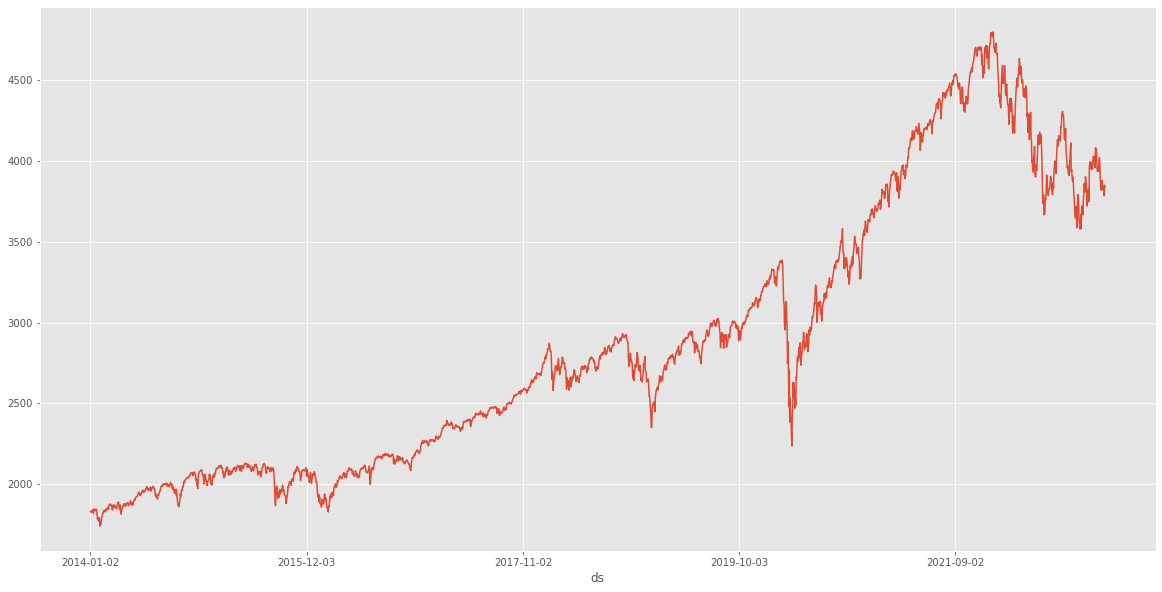

In [34]:
# Look at a plot of  the data
market_df.set_index('ds').y.plot();

>Notice the dip due to COVID from 2020-02-17 through 2020-06-17. Use the following code to create a non-recurring holiday due to covid.  Since the dip due to covid only occurs during 2020, we don't want the model to learn the pattern from the data. This code will tell the model that the dip only occurs on the dates that are specified.

In [35]:
from datetime import datetime
covid_dates = pd.date_range(start='2020-02-17',end='2020-06-17').strftime('%Y-%m-%d').tolist()

# Build the covid dataframe
covid = pd.DataFrame({
  'holiday': 'covid',
  'ds': pd.to_datetime(covid_dates),
  'lower_window': 0,
  'upper_window': 0,
})

covid

,holiday,ds,lower_window,upper_window
0,covid,2020-02-17,0,0
1,covid,2020-02-18,0,0
2,covid,2020-02-19,0,0
3,covid,2020-02-20,0,0
4,covid,2020-02-21,0,0
...,...,...,...,...
117,covid,2020-06-13,0,0
118,covid,2020-06-14,0,0
119,covid,2020-06-15,0,0
120,covid,2020-06-16,0,0


In [36]:
#Instantiate the model, and fit our data
model = Prophet(holidays = covid)

# Fit the model
model.fit(market_df)

07:55:36 - cmdstanpy - INFO - Chain [1] start processing
07:55:37 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
#build the future dataframe, forecasting for 1 year from now. 
future = model.make_future_dataframe(periods = 365, freq = 'D')

# Create a forecast by passing the future into model.predict()
forecast = model.predict(future)

# View the forecast
forecast.head().T

,0,1,2,3,4
ds,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00
trend,1824.218106,1824.818533,1826.619816,1827.220243,1827.82067
yhat_lower,1668.783733,1670.467753,1681.91911,1703.024404,1696.02283
yhat_upper,2037.70248,2040.945559,2071.864863,2064.647004,2052.519234
trend_lower,1824.218106,1824.818533,1826.619816,1827.220243,1827.82067
trend_upper,1824.218106,1824.818533,1826.619816,1827.220243,1827.82067
additive_terms,35.896763,37.971283,41.659952,43.418434,45.430429
additive_terms_lower,35.896763,37.971283,41.659952,43.418434,45.430429
additive_terms_upper,35.896763,37.971283,41.659952,43.418434,45.430429
covid,0.0,0.0,0.0,0.0,0.0


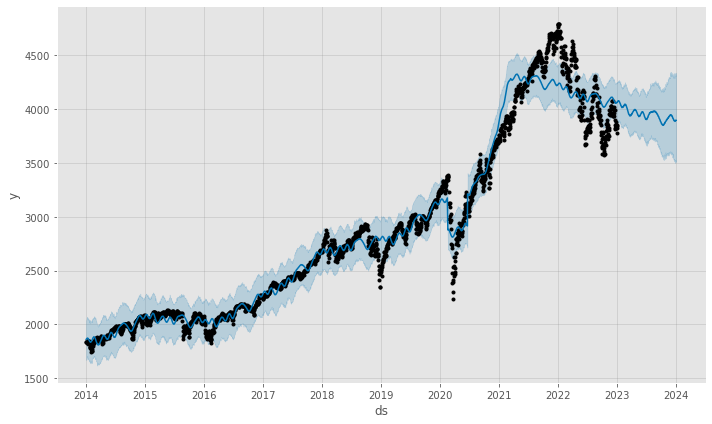

In [38]:
#now plot it!
model.plot(forecast);

> Notice that dip in the actual data around March 2020 (black dots). Notice that the predicted values (blue line) does not repeat the pattern going forward in March 2021, March 2022, etc.. Remember that we told the model that the dip in March 2020 was a non recurring holiday and would not occur again.

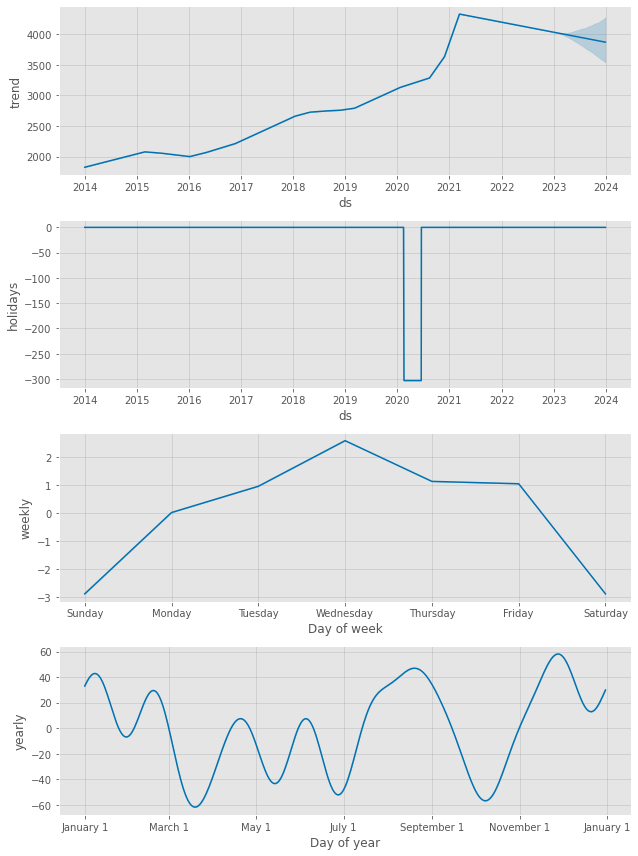

In [39]:
# PLot the components
model.plot_components(forecast);

As we saw above, if you're trying to do shortterm trading then this model is useless. But if you are investing with a timeframe of months to years, this forecast might provide some value.

Our forecast does great at trending, but doesn't do well at catching the volatility of the market. This would be very good for 'riding trends', but not so good for catching peaks and dips. 

We can see this in the numbers as well

In [40]:
#To do this, we have to get the y-hat and original y's from the data
metric_df = pd.concat([forecast[['ds','yhat']],market_df['y']], axis=1)

# The tail has NaN values, because they're predictions - there was no real Y. Let's drop those for model evaluation.
metric_df.dropna(inplace = True)

# Check the NaN were dropped
metric_df.tail()

,ds,yhat,y
2342,2022-12-26,4057.392664,3844.82
2343,2022-12-27,4059.865419,3829.25
2344,2022-12-28,4063.264599,3783.22
2345,2022-12-29,4063.742604,3849.28
2346,2022-12-30,4065.700163,3839.50


In [41]:
#calculate the r2
print("R-squared: ", r2_score(metric_df['y'], metric_df['yhat']))

R-squared:  0.9696840653652619


In [42]:
#MAE
print("Mean Squared Error: ", mean_squared_error(metric_df['y'], metric_df['yhat']))

Mean Squared Error:  21087.31590842048


In [43]:
#RMSE
print("RMSE: ", np.sqrt(mean_squared_error(metric_df['y'], metric_df['yhat'])))

RMSE:  145.21472345606173
